![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [168]:
# Start your code here!
#Looking at Hypotheses, we are going to see if performing a right-tailed independent t-test is appropriate. Need to ensure that assumptions are met for the parametric test. If not Wilcoxon-Mann-Whitney test will be used. 
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np


In [169]:
women = pd.read_csv("women_results.csv", index_col=0)
men = pd.read_csv('men_results.csv', index_col=0)

In [170]:
#looking at the dataframes
print(f'women: {women.columns} \n' f'men: {men.columns}')
print(women.dtypes, men.dtypes)

women: Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object') 
men: Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object


In [171]:
#adding target gender variable before merging dataframes
women['gender'] = 'women'
men['gender'] = 'men'
print(women, men)

            date home_team    away_team  ...  away_score        tournament gender
0     1969-11-01     Italy       France  ...           0              Euro  women
1     1969-11-01   Denmark      England  ...           3              Euro  women
2     1969-11-02   England       France  ...           0              Euro  women
3     1969-11-02     Italy      Denmark  ...           1              Euro  women
4     1975-08-25  Thailand    Australia  ...           2  AFC Championship  women
...          ...       ...          ...  ...         ...               ...    ...
4879  2022-07-22    Sweden      Belgium  ...           0         UEFA Euro  women
4880  2022-07-23    France  Netherlands  ...           0         UEFA Euro  women
4881  2022-07-26   England       Sweden  ...           0         UEFA Euro  women
4882  2022-07-27   Germany       France  ...           1         UEFA Euro  women
4883  2022-07-31   England      Germany  ...           1         UEFA Euro  women

[4884 rows x 7 

In [172]:
df = women.append(men)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df = df[(df['date'] >= '2002-01-01') & (df['tournament'].isin(['FIFA World Cup']))]
print(df['date'].sort_values())

25164   2002-05-31
25167   2002-06-01
25165   2002-06-01
25166   2002-06-01
25171   2002-06-02
           ...    
44343   2022-12-10
44345   2022-12-13
44346   2022-12-14
44350   2022-12-17
44352   2022-12-18
Name: date, Length: 584, dtype: datetime64[ns]


In [173]:
#Varaibles included in the test: DV= Goals scored (home_score + away_score), IV = Gender, Condition = FIFA World Cup games
df['goals'] = df['away_score'] + df['home_score']
print(df[['away_score', 'home_score', 'goals']])

       away_score  home_score  goals
1600            3           0      3
1601            0           2      2
1602            1           4      5
1603            0           6      6
1604            1           3      4
...           ...         ...    ...
44343           2           1      3
44345           0           3      3
44346           0           2      2
44350           1           2      3
44352           3           3      6

[584 rows x 3 columns]


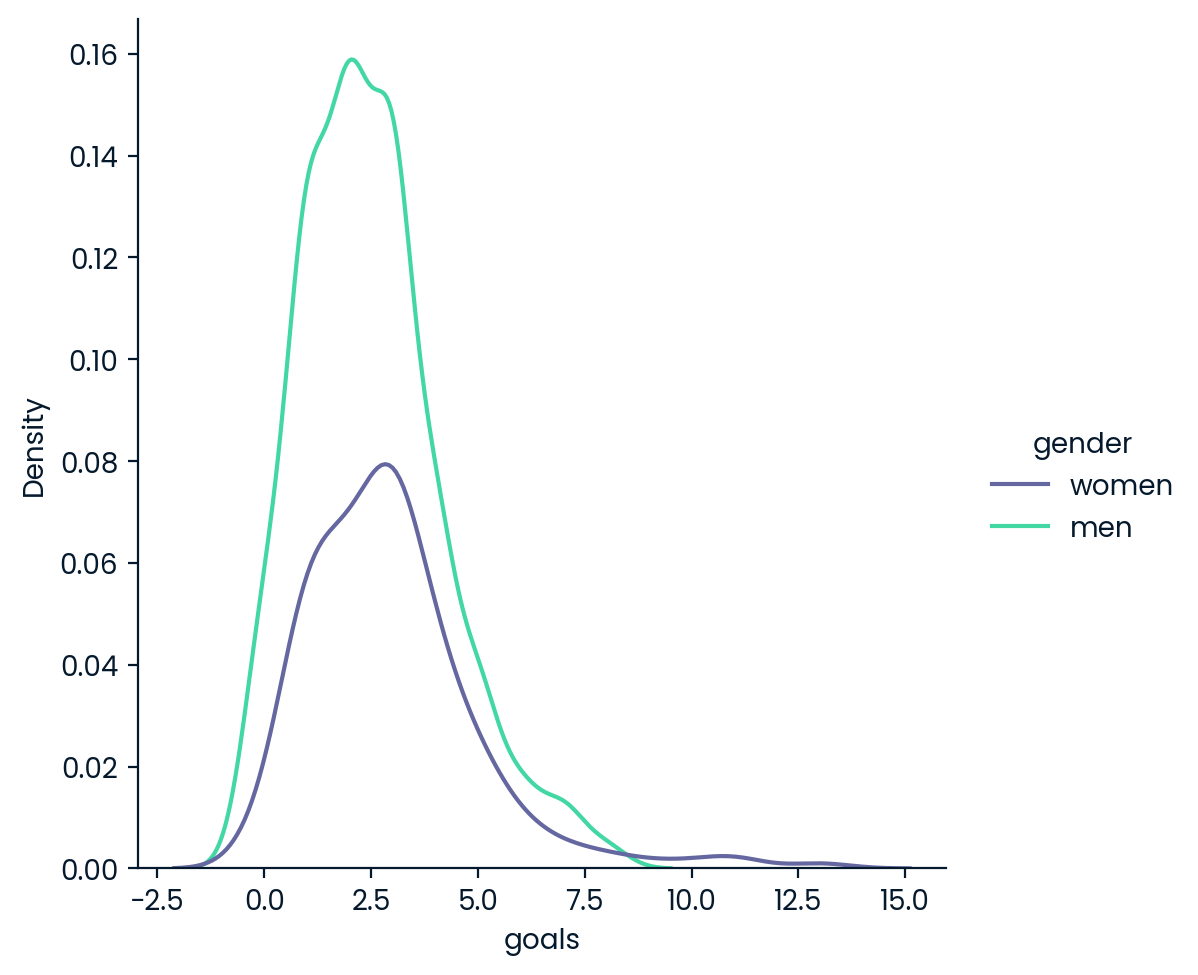

In [174]:
sns.displot(data=df, x='goals', hue='gender', kind='kde')
#looking at the distribution plots, there seems to be non-normality

<AxesSubplot: xlabel='goals', ylabel='Count'>

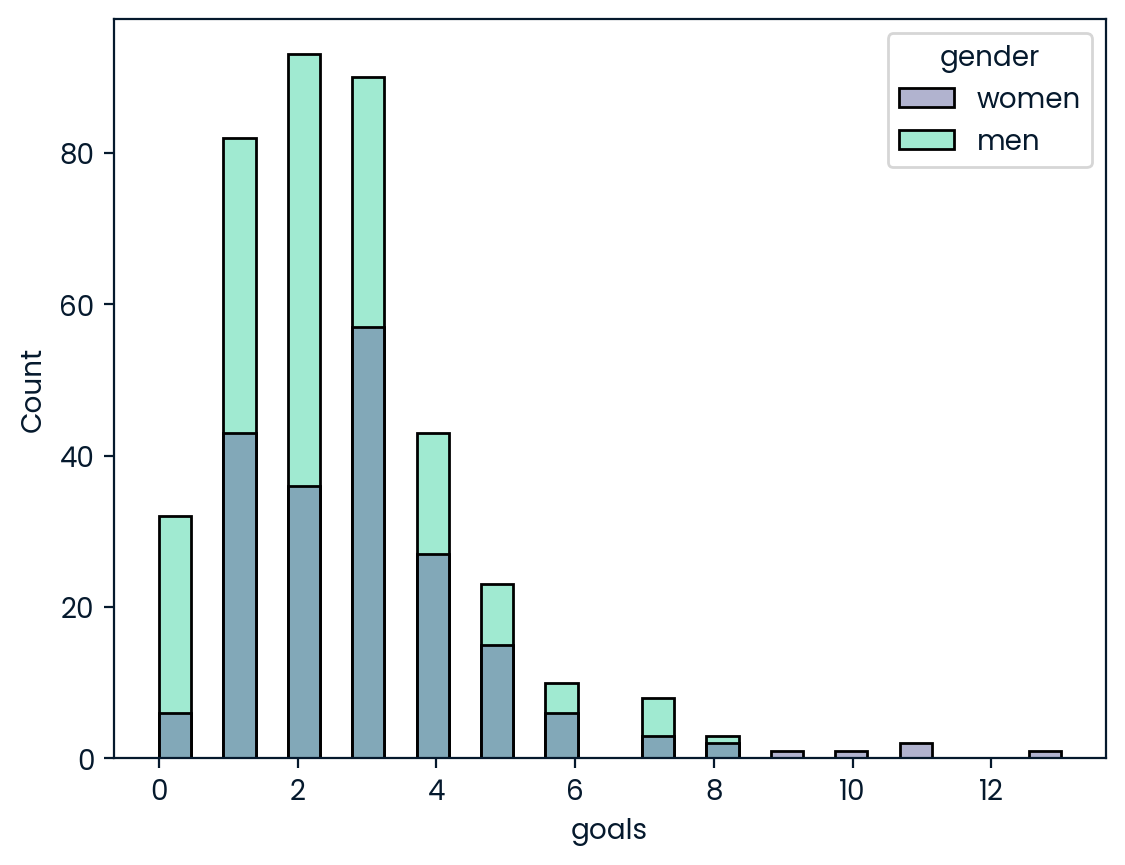

In [175]:
sns.histplot(data=df, x='goals', hue='gender')

In [176]:
#setting alpha to 10% per instructions. Will be a preliminary look at the hypotheses, so providing a larger alpha allows us to account for less stringent test criterion. 
#Since data is not normally distributed, right-tailed (greater than) Wilcoxon-Mann-Whitney test will be used.
import pingouin
alpha = .1
#setting up data for Mann-Whitney Test
gender_vs_goals = df[['gender', 'goals']]
gender_vs_goals_wide = gender_vs_goals.pivot(columns = 'gender', values= 'goals')
mwu_test = pingouin.mwu(x=gender_vs_goals_wide['women'], y = gender_vs_goals_wide['men'], alternative = 'greater')
print(mwu_test)
print(f"women: {gender_vs_goals_wide['women'].mean()}\n" + f"men: {gender_vs_goals_wide['men'].mean()}")
print(gender_vs_goals_wide)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451
women: 2.98
men: 2.5130208333333335
gender  men  women
1600    NaN    3.0
1601    NaN    2.0
1602    NaN    5.0
1603    NaN    6.0
1604    NaN    4.0
...     ...    ...
44343   3.0    NaN
44345   3.0    NaN
44346   2.0    NaN
44350   3.0    NaN
44352   6.0    NaN

[584 rows x 2 columns]


In [177]:
#creating dictionary with result of test: p_value and result (accept or reject null)
p_val = mwu_test['p-val'].values[0]
result_dict={'p_val':p_val, 'result':'reject'}
print(result_dict)


{'p_val': 0.005106609825443641, 'result': 'reject'}
